In [57]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, recall_score, precision_score

This project attempts to predict housing price in Miami with relevance to surround and amenities it have.

In [42]:
Miami_house_prices = pd.read_csv('miami-housing.csv')
Miami_house_prices.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


number of attributes and tell something about some column or which is important

In [43]:
Miami_house_prices.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


count of observations and how data is scattered

In [44]:
Miami_house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

information about data type, count of null values and not null values .

In [45]:
Miami_house_prices.isnull().sum()

,0
LATITUDE,0
LONGITUDE,0
PARCELNO,0
SALE_PRC,0
LND_SQFOOT,0
TOT_LVG_AREA,0
SPEC_FEAT_VAL,0
RAIL_DIST,0
OCEAN_DIST,0
WATER_DIST,0


Ques1. **Option C. All the other answers are incorrect.**

Ques2. **Option B. No there is no same kind of data type for SALE_PRC & AGE.**

Ques3. Option

In [46]:
Miami_house_prices[Miami_house_prices.duplicated]

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality


Ques4. **Option B: there is no duplicated values**

In [47]:
Miami_house_prices_corelated = Miami_house_prices.corr()

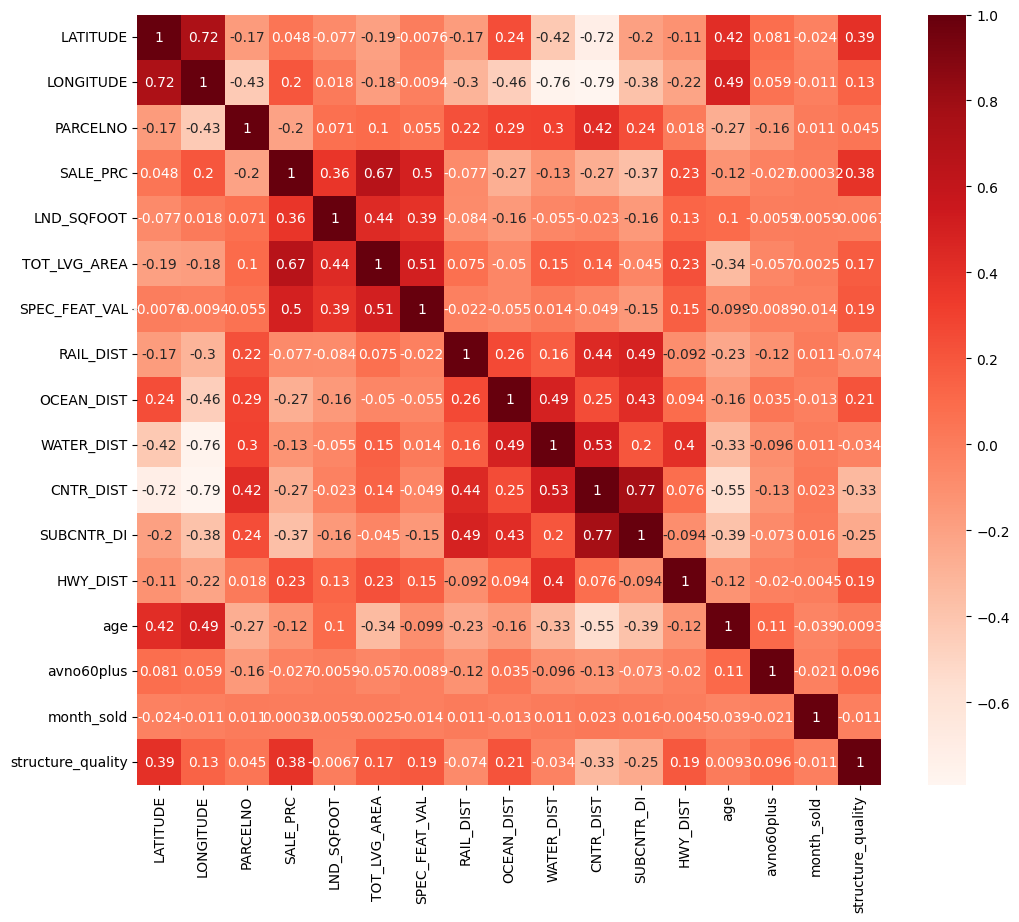

In [48]:
plt.figure(figsize=(12,10))
sns.heatmap(Miami_house_prices_corelated, annot=True, cmap=plt.cm.Reds)
plt.show()


Ques5. **Option D: SALE_PRC has TOT_LIV_AREA as highest correlation with.**

Ques6. **0.38**

Ques7. **Option B: No there is no positive relation between SALE_PRC & OCEAN_DIST**

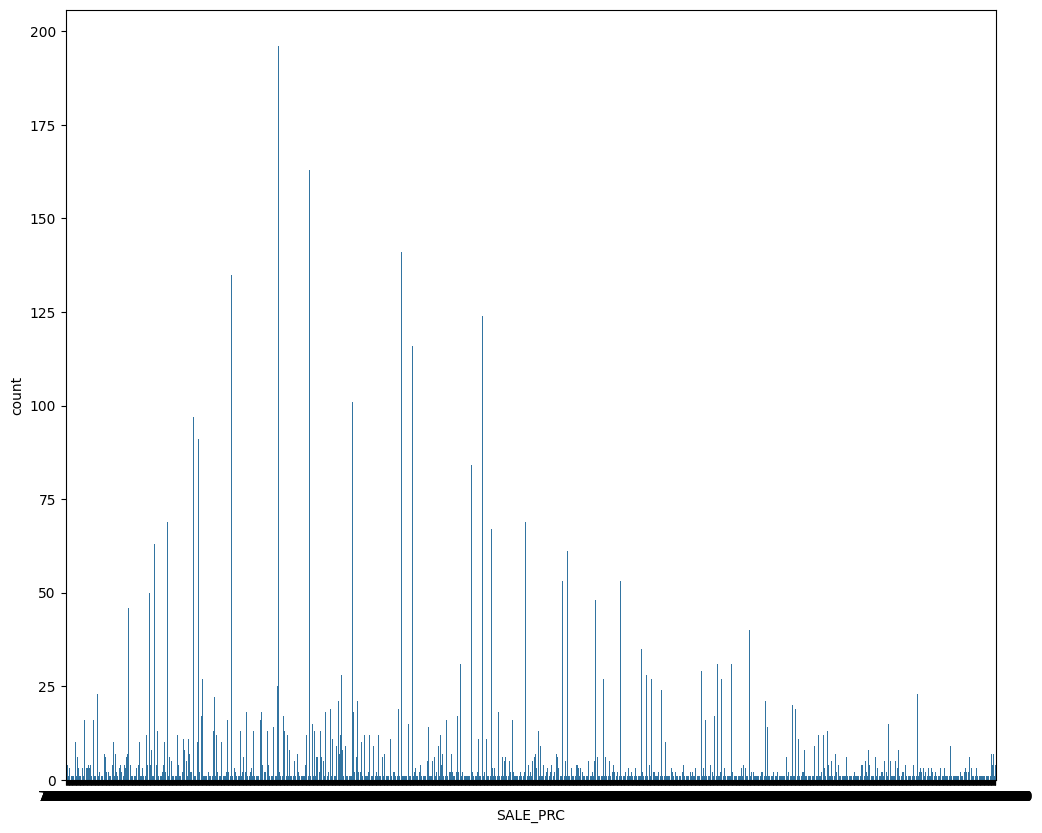

In [49]:
plt.figure(figsize=(12,10))
sns.countplot(x="SALE_PRC", data=Miami_house_prices)
plt.show()

Ques8. **Both C & D are correct**

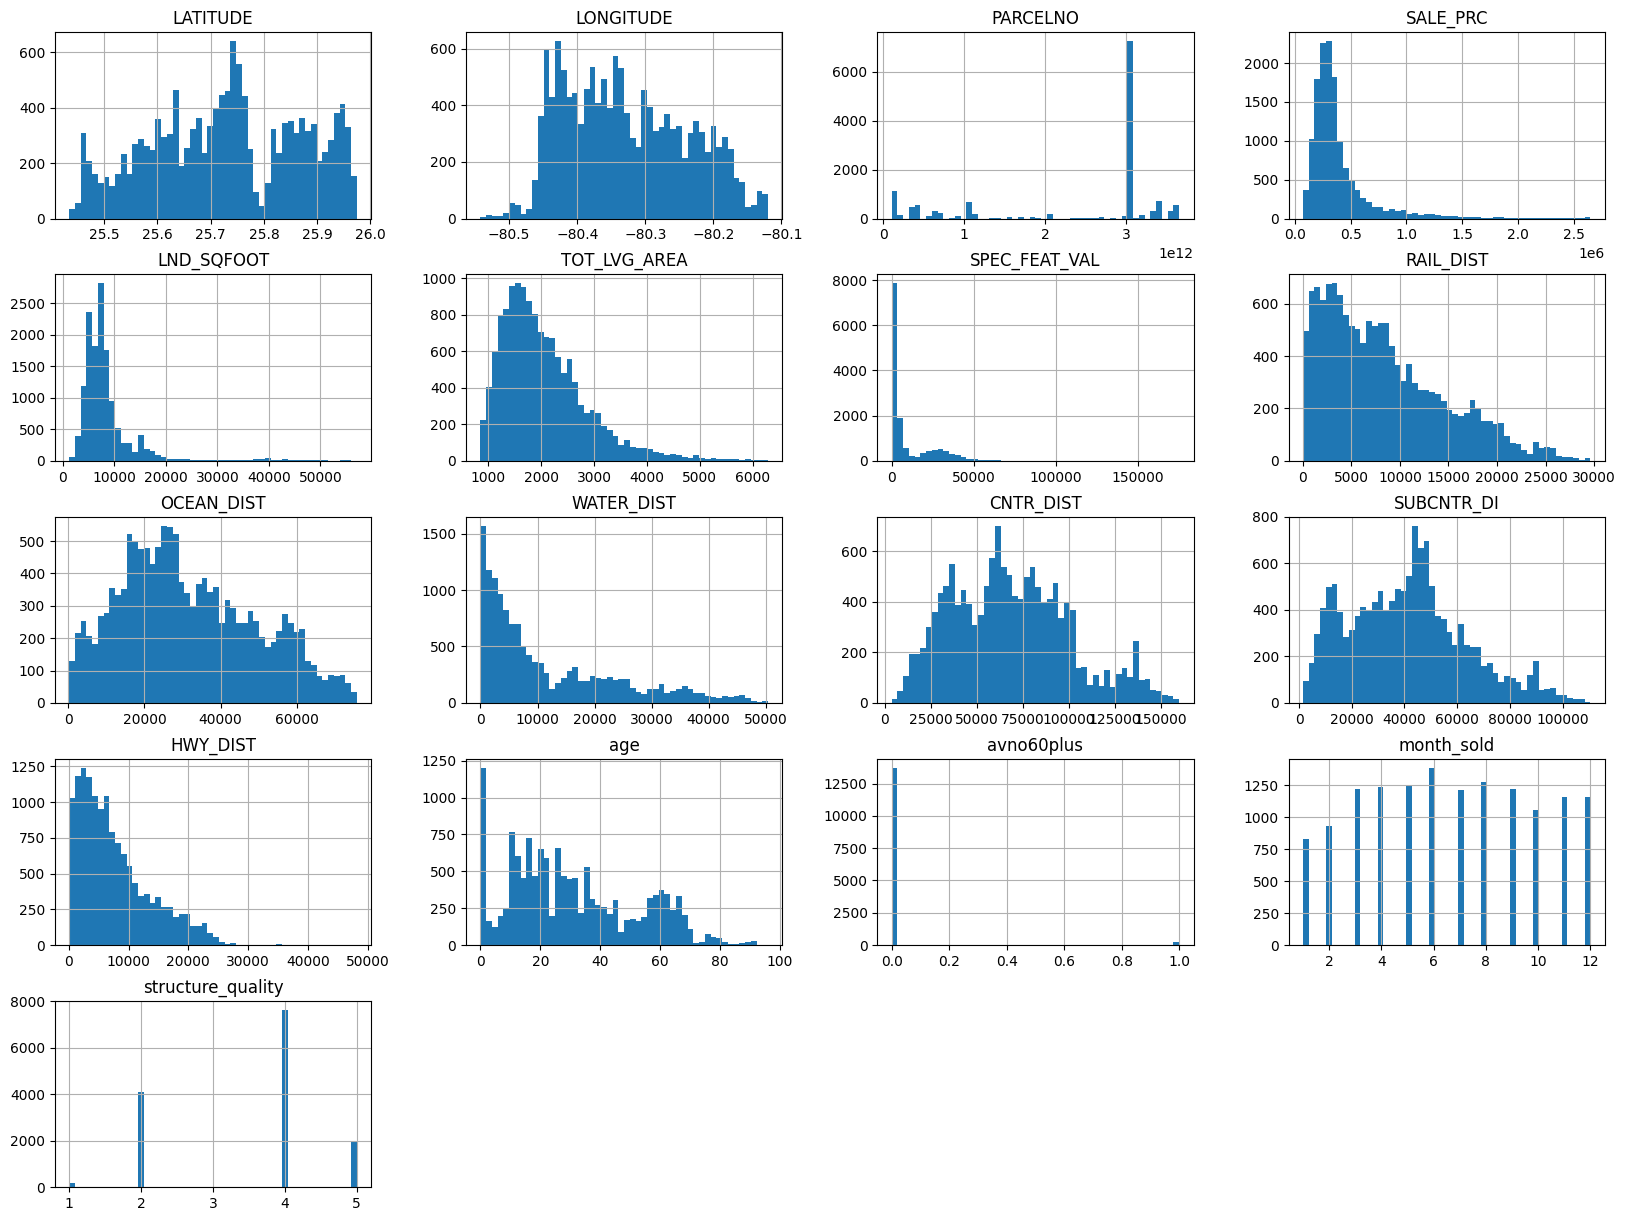

In [50]:
Miami_house_prices.hist(bins=50, figsize=(20,15))
plt.show()



In [51]:
Miami_house_prices.drop(columns=['PARCELNO'], inplace=True)

In [53]:
#lets create the X and y columns for prediction

X = Miami_house_prices['TOT_LVG_AREA']
X = X.values.reshape(-1,1)
y = Miami_house_prices['SALE_PRC']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print("slope of the line: ",regr.coef_[0])
print("intercept of the line: ",regr.intercept_)

slope of the line:  261.41387747406714
intercept of the line:  -137199.04188888293


Ques10. df.**hist**(bins =20, figsize=(20,20), color = 'b')

Ques11. **option C ; Scatterplot**

Ques12. **option D & A **

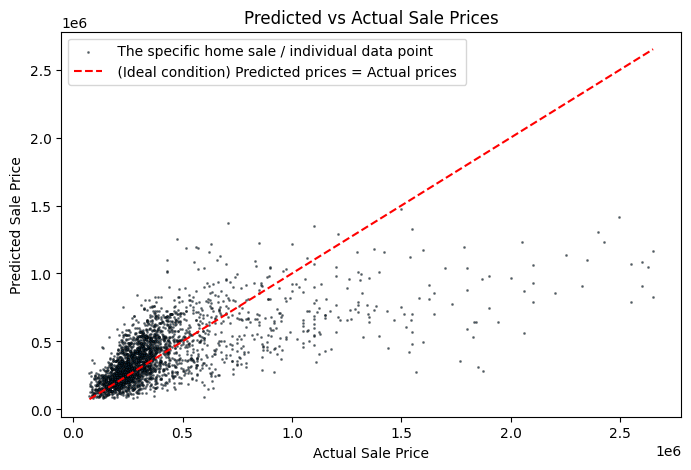

In [65]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5,s=1, edgecolor='k',label=" The specific home sale / individual data point ")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label=" (Ideal condition) Predicted prices = Actual prices ")
plt.title('Predicted vs Actual Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.show()

In [56]:
mse = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Absolute Error: 145779.61272093008
R-squared: 0.42771842643375446


In [58]:
#cant find here

accu = accuracy_score(y_test, y_pred)
reca = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [60]:
data = pd.DataFrame({'TOT_LVG_AREA': 1753}, index =[0])
data

,TOT_LVG_AREA
0,1753


In [62]:
regr.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([321059.48532316])

In [64]:
all_feat = Miami_house_prices.drop(columns=['SALE_PRC'], axis = 1)
price = Miami_house_prices['SALE_PRC']

In [66]:
all_feat_train, all_feat_test, price_train, price_test = train_test_split(all_feat, price, test_size=0.2, random_state=40)


regr1 = linear_model.LinearRegression()
regr1.fit(all_feat_train, price_train)
y_pred1 = regr1.predict(all_feat_test)
print("slope of the line: ",regr1.coef_[0])
print("intercept of the line: ",regr1.intercept_)

slope of the line:  -1059973.7233050321
intercept of the line:  180811028.3236194


In [67]:
new_feat = pd.DataFrame({
        'LATITUDE': [25.77],'LONGITUDE': [-80.19],
        'LND_SQFOOT': [10000],
        'TOT_LVG_AREA': [2000],
        'SPEC_FEAT_VAL': [10000],
        'RAIL_DIST': [1000],
        'OCEAN_DIST': [1000],
        'WATER_DIST': [1000],
        'CNTR_DIST': [1000],
        'SUBCNTR_DI': [1000],
        'HWY_DIST': [1000],
        'age': [20],
        'avno60plus': [1],
        'month_sold': [1],
        'structure_quality': [1]
    })
new_feat

,LATITUDE,LONGITUDE,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.77,-80.19,10000,2000,10000,1000,1000,1000,1000,1000,1000,20,1,1,1


In [68]:
new1_pred = regr1.predict(new_feat)
new1_pred

array([449210.58235088])

In [69]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [70]:
import joblib

In [71]:
joblib.dump(regr1, "miami_housing_model")

['miami_housing_model']

In [72]:
model1 = joblib.load("miami_housing_model")

In [73]:
model1.predict(new_feat)

array([449210.58235088])